#Função a ser aproximada: Griewank

## **Plot 2D da função Griewank**

![alt text](http://2.bp.blogspot.com/_otsWqKrA2RI/TJHH5DguZjI/AAAAAAAAACo/01VNZLSvrlo/s400/fn_griewank.bmp)

### **Definição e ótimo global:**
### Observação: Considere o intervalo entre 0 e 1 para simplificação!

![alt text](https://www.cs.unm.edu/~neal.holts/dga/benchmarkFunction/images/griewankLatex.png)

#Declarar a função

In [ ]:
import math
def Griewank(input):
    sum = 0
    for x in input:
        sum += x * x
    product = 1
    for i in range(len(input)):
        product *= math.cos(input[i] / math.sqrt(i + 1))
    return 1 + sum / 4000 - product

In [ ]:
#Teste de chamada para duas variáveis
Griewank([2,3])

0.7855494848011055

#Amostragem da função a ser aproximada

In [ ]:
!pip install pyDOE
from pyDOE import *

In [ ]:
n = 2 #numero de fatores
samples = 1000
criterion = 'center'
lhs_samples = lhs(n, samples, criterion) # gera as amostras com o hipercubo latino
lhs_samples[0:5] # 5 primeiras amostras

array([[0.4365, 0.0485],
       [0.8605, 0.5885],
       [0.2205, 0.9875],
       [0.2685, 0.3235],
       [0.1655, 0.2975]])

In [ ]:
#Saída para cada input
y = []
for i in lhs_samples:
  y.append(Griewank(i))

#Separar base em treino e validação

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(lhs_samples, y, test_size = 0.2, shuffle=True)

X_train = np.asarray(X_train)
X_val = np.asarray(X_val)
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)

#Treinamento da Rede Neural para aproximar a função

In [ ]:
# Importando as bibliotecas do Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Iniciando a Rede Neural
classifier = Sequential()

# Adicionando a camada de input e a primeira camada escondida
classifier.add(Dense(units = 6, activation = 'relu', input_dim = n))
classifier.add(Dropout(rate = 0.1))

# Adicionando a camada de saída
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede neural
classifier.compile(optimizer = 'adam', loss = 'mse')

# Visualização das camadas da rede
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Treinando a rede neural
history = classifier.fit(X_train, y_train, batch_size = 64, epochs = 500, 
                               validation_data = (X_val,y_val))

Epoch 1/500
13/13 [==============================] - 0s 11ms/step - loss: 0.0866 - val_loss: 0.0802
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0818 - val_loss: 0.0759
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0772 - val_loss: 0.0715
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0728 - val_loss: 0.0672
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0679 - val_loss: 0.0627
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0630 - val_loss: 0.0582
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0536
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0494
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0493 - val_loss: 0.0457
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0458 - val_loss: 0.0427
Epoch 11

#Avaliar erros de treino e validação

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


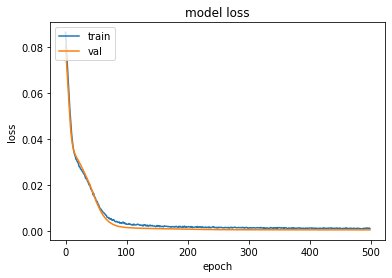

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Fazer previsões e avaliar a rede treinada

###Exercício 1: Avalie a rede treinada com 500 dados amostrados com com LHS. Salve em uma variável chamada 'y_test' os dados gerados.

In [ ]:
#criar base de teste
samples = 500
X_test = lhs(n, samples, criterion) # gera as amostras com o hipercubo latino

#Saída para cada input
y_test = []
for i in X_test:
  y_test.append(Griewank(i))

###Exercício 2: Utilize a rede neural para prever o resultado da função para as entradas geradas acima. Chame a variável com os resultados de 'y_pred'.

In [ ]:
# Previsão da base de teste
y_pred = classifier.predict(X_test)

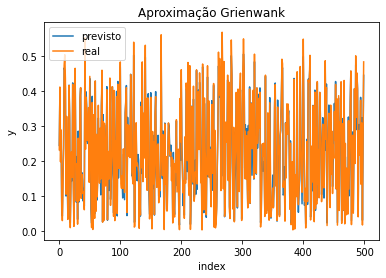

In [ ]:
#Real vs. Previsto
plt.plot(y_pred)
plt.plot(y_test)
plt.title('Aproximação Grienwank')
plt.ylabel('y')
plt.xlabel('index')
plt.legend(['previsto', 'real'], loc='upper left')
plt.show()

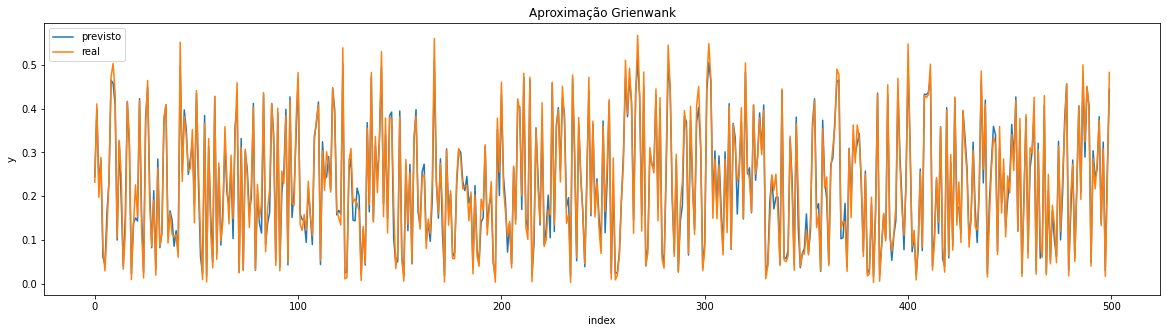

In [ ]:
# Vamos aumentar o gráfico
plt.figure(figsize=(20,5))
#Real vs. Previsto
plt.plot(y_pred)
plt.plot(y_test)
plt.title('Aproximação Grienwank')
plt.ylabel('y')
plt.xlabel('index')
plt.legend(['previsto', 'real'], loc='upper left')
plt.show()

###Exercício 3: Faça um plot como o acima, mas utilizando somente 50 amostras da base de teste.

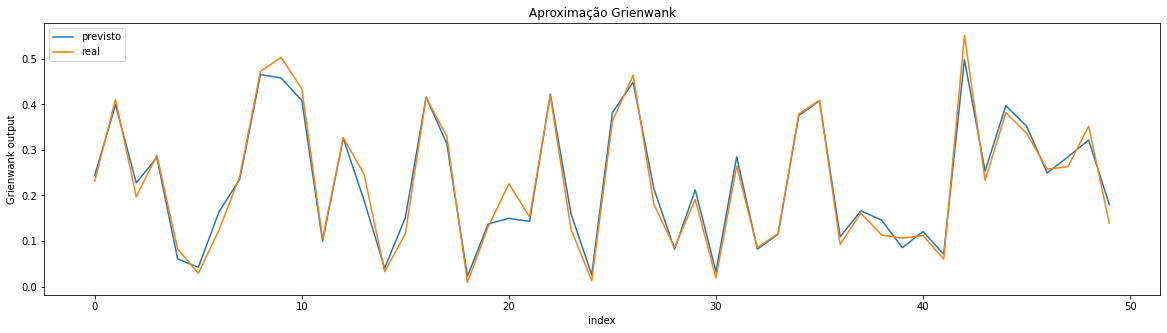

In [ ]:
#Real vs. Previsto: parcial
small_y_test = y_test[0:50]
small_y_pred = y_pred[0:50]

plt.figure(figsize=(20,5))
plt.plot(small_y_pred)
plt.plot(small_y_test)
plt.title('Aproximação Grienwank')
plt.ylabel('Grienwank output')
plt.xlabel('index')
plt.legend(['previsto', 'real'], loc='upper left')
plt.show()

In [ ]:
# calcular o erro para a base de teste
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_pred,y_test) 

0.0005760973419046182